In [23]:
%matplotlib widget
import numpy as np
from numpy import linalg as la
import pandas as pd
import cvxopt
from cvxopt import matrix, solvers 
import matplotlib
import matplotlib.pyplot as plt
from itertools import combinations_with_replacement

In [24]:
df = pd.read_csv('Classify-3DwLabels-2.txt', sep=',', header=None, names=["Col1", "Col2","Col3", "Class"])
df["Class"] = df[["Class"]].replace(0,-1)
df.head()

,Col1,Col2,Col3,Class
0,-0.25,0.13,-0.36,-1
1,0.89,0.26,0.92,1
2,0.61,0.52,0.66,-1
3,-0.63,0.80,-0.05,-1
4,-0.25,-0.14,0.89,-1


In [25]:
df1 = df[df['Class'] == 1]
df2 = df[df['Class'] == -1]
df1 = df1.drop(['Class'], axis=1)
df2 = df2.drop(['Class'], axis=1)
X_1 = df1.to_numpy()
X_2 = df2.to_numpy()
m1 = df1.shape[0]
m2 = df2.shape[0]
df1_sum = df1.sum(axis=0)
df2_sum = df2.sum(axis=0)
df1_mean = df1_sum/m1
df2_mean = df2_sum/m2
mean_1 = df1_mean.to_numpy()
mean_2 = df2_mean.to_numpy()
print(X_1.shape[0], 'originally classified as 1')
print(X_2.shape[0], 'originally classified as -1')

142 originally classified as 1
108 originally classified as -1


In [26]:
def get_powers(degree):
    l=[0,1,2]
    powers=[]
    for i in range(1,degree+1):
        powers.append([x for x in combinations_with_replacement(l,i)])
    powers_flattened=[]
    for sublist in powers:
        for x in sublist:
            powers_flattened.append(x)
    return powers_flattened

In [27]:
def transform_data(X,powers):
    X_new=np.ones((X.shape[0],len(powers)))
    for n in range(X.shape[0]):
        #print(n)
        for i in range(len(powers)):
            for j in powers[i]:
                X_new[n][i]=X_new[n][i]*X[n][j]
    return X_new

In [50]:
powers_1=get_powers(1)
powers_2=get_powers(2)
powers_3=get_powers(3)
powers_4=get_powers(4)
print('Polynomial 1')
print(powers_1, '\n')
print('Polynomial 2')
print(powers_2, '\n')
print('Polynomial 3')
print(powers_3, '\n')
print('Polynomial 4')
print(powers_4)

Polynomial 1
[(0,), (1,), (2,)] 

Polynomial 2
[(0,), (1,), (2,), (0, 0), (0, 1), (0, 2), (1, 1), (1, 2), (2, 2)] 

Polynomial 3
[(0,), (1,), (2,), (0, 0), (0, 1), (0, 2), (1, 1), (1, 2), (2, 2), (0, 0, 0), (0, 0, 1), (0, 0, 2), (0, 1, 1), (0, 1, 2), (0, 2, 2), (1, 1, 1), (1, 1, 2), (1, 2, 2), (2, 2, 2)] 

Polynomial 4
[(0,), (1,), (2,), (0, 0), (0, 1), (0, 2), (1, 1), (1, 2), (2, 2), (0, 0, 0), (0, 0, 1), (0, 0, 2), (0, 1, 1), (0, 1, 2), (0, 2, 2), (1, 1, 1), (1, 1, 2), (1, 2, 2), (2, 2, 2), (0, 0, 0, 0), (0, 0, 0, 1), (0, 0, 0, 2), (0, 0, 1, 1), (0, 0, 1, 2), (0, 0, 2, 2), (0, 1, 1, 1), (0, 1, 1, 2), (0, 1, 2, 2), (0, 2, 2, 2), (1, 1, 1, 1), (1, 1, 1, 2), (1, 1, 2, 2), (1, 2, 2, 2), (2, 2, 2, 2)]


In [51]:
X_1_expanded_1 = transform_data(X_1,powers_1)
X_1_expanded_2 = transform_data(X_1,powers_2)
X_1_expanded_3 = transform_data(X_1,powers_3)
X_1_expanded_4 = transform_data(X_1,powers_4)
X_2_expanded_1 = transform_data(X_2,powers_1)
X_2_expanded_2 = transform_data(X_2,powers_2)
X_2_expanded_3 = transform_data(X_2,powers_3)
X_2_expanded_4 = transform_data(X_2,powers_4)

In [52]:
print('New X for each polynomial (first row)\n')
print('---------------------')
print('Polynomial 1 for X_1')
print(X_1_expanded_1[0:1], '\n')
print('Polynomial 2 for X_1')
print(X_1_expanded_2[0:1], '\n')
print('Polynomial 3 for X_1')
print(X_1_expanded_3[0:1], '\n')
print('Polynomial 4 for X_1')
print(X_1_expanded_4[0:1], '\n')
print('---------------------')
print('Polynomial 1 for X_2')
print(X_2_expanded_1[0:1], '\n')
print('Polynomial 2 for X_2')
print(X_2_expanded_2[0:1], '\n')
print('Polynomial 3 for X_2')
print(X_2_expanded_3[0:1], '\n')
print('Polynomial 4 for X_2')
print(X_2_expanded_4[0:1])

New X for each polynomial (first row)

---------------------
Polynomial 1 for X_1
[[0.89 0.26 0.92]] 

Polynomial 2 for X_1
[[0.89   0.26   0.92   0.7921 0.2314 0.8188 0.0676 0.2392 0.8464]] 

Polynomial 3 for X_1
[[0.89     0.26     0.92     0.7921   0.2314   0.8188   0.0676   0.2392
  0.8464   0.704969 0.205946 0.728732 0.060164 0.212888 0.753296 0.017576
  0.062192 0.220064 0.778688]] 

Polynomial 4 for X_1
[[0.89       0.26       0.92       0.7921     0.2314     0.8188
  0.0676     0.2392     0.8464     0.704969   0.205946   0.728732
  0.060164   0.212888   0.753296   0.017576   0.062192   0.220064
  0.778688   0.62742241 0.18329194 0.64857148 0.05354596 0.18947032
  0.67043344 0.01564264 0.05535088 0.19585696 0.69303232 0.00456976
  0.01616992 0.05721664 0.20245888 0.71639296]] 

---------------------
Polynomial 1 for X_2
[[-0.25  0.13 -0.36]] 

Polynomial 2 for X_2
[[-0.25    0.13   -0.36    0.0625 -0.0325  0.09    0.0169 -0.0468  0.1296]] 

Polynomial 3 for X_2
[[-0.25      0.13

In [53]:
def classify(d):
    if d == 1:
        X_1_expanded = X_1_expanded_1
        X_2_expanded = X_2_expanded_1
    if d == 2:
        X_1_expanded = X_1_expanded_2
        X_2_expanded = X_2_expanded_2
    if d == 3:
        X_1_expanded = X_1_expanded_3
        X_2_expanded = X_2_expanded_3
    if d == 4:
        X_1_expanded = X_1_expanded_4
        X_2_expanded = X_2_expanded_4
    mean_1_expanded = np.mean(X_1_expanded, axis=0)
    mean_2_expanded = np.mean(X_2_expanded, axis=0)
    takenorm_1_1 = X_1_expanded-mean_1_expanded
    takenorm_1_2 = X_1_expanded-mean_2_expanded
    takenorm_2_1 = X_2_expanded-mean_1_expanded
    takenorm_2_2 = X_2_expanded-mean_2_expanded
    norm_1_1 = []
    norm_1_2 = []
    classify_as_1 = []
    classify_as_neg1 = []
    takenorm_1_1_squared = takenorm_1_1**2
    takenorm_1_2_squared = takenorm_1_2**2
    norm_1_1 = np.sum(takenorm_1_1_squared, axis=1)
    norm_1_2 = np.sum(takenorm_1_2_squared, axis=1)
    classify_1 = []
    error_1 = 0
    for i in range (0,m1):
        if norm_1_1[i] < norm_1_2[i]:
            classify_1.append(1)
            classify_as_1.append(X_1[i])
        else:
            classify_1.append(0)
            error_1 = error_1 + 1
            classify_as_neg1.append(X_1[i])
    norm_2_1 = []
    norm_2_2 = []
    takenorm_2_1_squared = takenorm_2_1**2
    takenorm_2_2_squared = takenorm_2_2**2
    norm_2_1 = np.sum(takenorm_2_1_squared, axis=1)
    norm_2_2 = np.sum(takenorm_2_2_squared, axis=1)
    classify_2 = []
    error_2 = 0
    for i in range (0,m2):
        if norm_2_2[i] < norm_2_1[i]:
            classify_2.append(1)
            classify_as_neg1.append(X_2[i])
        else:
            classify_2.append(0)
            error_2 = error_2 + 1
            classify_as_1.append(X_2[i])
    classify_as_1 = np.array(classify_as_1)
    classify_as_neg1 = np.array(classify_as_neg1)
    error = error_1 + error_2
    fig = plt.figure()
    ax1 = fig.add_subplot(121, projection='3d')
    ax2 = fig.add_subplot(122, projection='3d')
    ax1.scatter(X_1[:,0], X_1[:,1], X_1[:,2], c='red')
    ax1.scatter(X_2[:,0], X_2[:,1], X_2[:,2], c='blue')
    ax1.title.set_text("Original Classification")
    ax2.title.set_text("New Classification")
    ax2.scatter(classify_as_1[:,0], classify_as_1[:,1], classify_as_1[:,2], c='red')
    ax2.scatter(classify_as_neg1[:,0], classify_as_neg1[:,1], classify_as_neg1[:,2], c='blue')
    print(classify_as_1.shape[0], 'classified as 1')
    print(classify_as_neg1.shape[0], 'classified as -1')
    print('The number of missclassified points is', error, 'out of', df.shape[0])
    plt.show()


In [54]:
def four_polynomials():
    print('When P=1')
    classify(1)
    print('-----------------------------')
    print('When P=2')
    classify(2)
    print('-----------------------------')
    print('When P=3')
    classify(3)
    print('-----------------------------')
    print('When P=4')
    classify(4)
    print('-----------------------------')

When P=1
137 classified as 1
113 classified as -1
The number of missclassified points is 19 out of 250


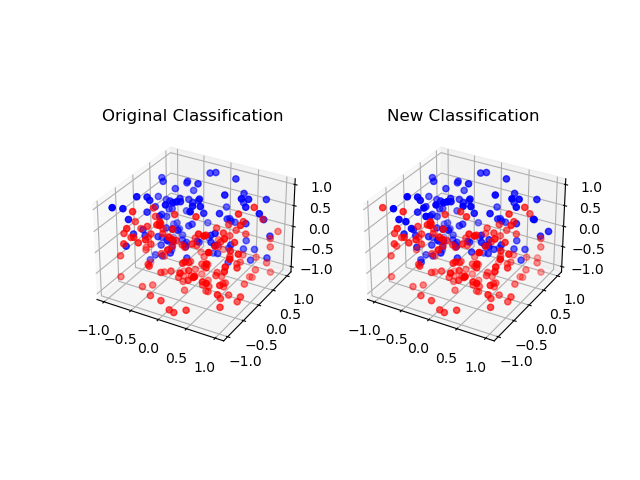

-----------------------------
When P=2
140 classified as 1
110 classified as -1
The number of missclassified points is 18 out of 250


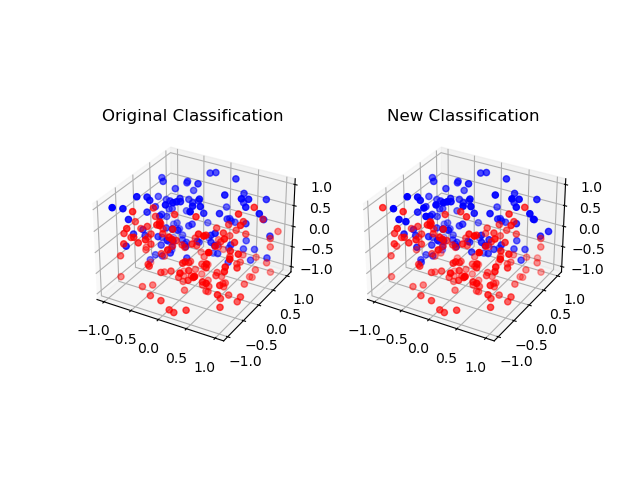

-----------------------------
When P=3
139 classified as 1
111 classified as -1
The number of missclassified points is 19 out of 250


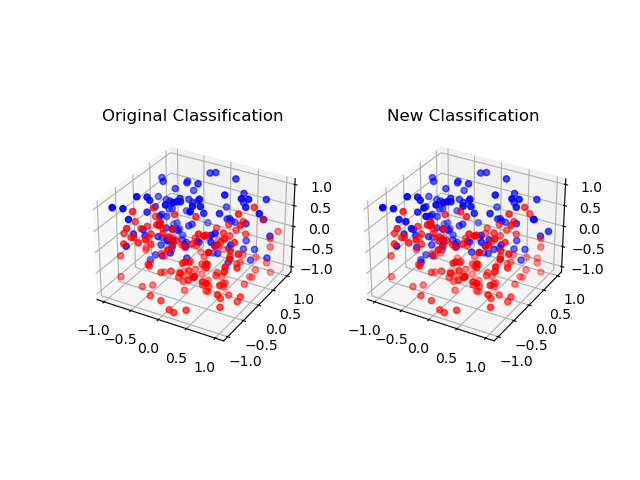

-----------------------------
When P=4
142 classified as 1
108 classified as -1
The number of missclassified points is 20 out of 250


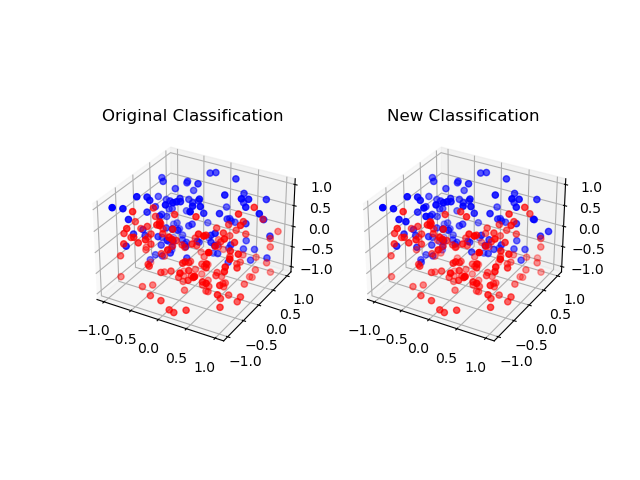

-----------------------------


In [55]:
four_polynomials()